In [ ]:
# -------------------------------------------
# STEP 1: Import Libraries
# -------------------------------------------
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# -------------------------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -------------------------------------------
# STEP 2: Load & Preprocess Dataset
# -------------------------------------------
yes_path = "/content/drive/MyDrive/BrainTumor/yes"
no_path = "/content/drive/MyDrive/BrainTumor/no"

yes_files = os.listdir(yes_path)
no_files = os.listdir(no_path)

X_data, y_data = [], []

# YES (tumor) images
for file in yes_files:
    img = cv2.imread(os.path.join(yes_path, file))
    if img is None:
        continue
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_data.append(img)
    y_data.append(1)

# NO (no tumor) images
for file in no_files:
    img = cv2.imread(os.path.join(no_path, file))
    if img is None:
        continue
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_data.append(img)
    y_data.append(0)

# Convert to numpy arrays and normalize
X = np.array(X_data, dtype="float32") / 255.0
y = np.array(y_data)

# Train/Validation/Test Split
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)
# -------------------------------------------


In [ ]:
# -------------------------------------------
# STEP 3: Build & Train the CNN Model
# -------------------------------------------
model = Sequential([
    Conv2D(16, kernel_size=9, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Dropout(0.45),

    Conv2D(16, kernel_size=9, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),

    Conv2D(36, kernel_size=9, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.15),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_valid, y_valid),
    verbose=1
)
# -------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.4833 - loss: 0.7223 - val_accuracy: 0.6842 - val_loss: 0.6776
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.6128 - loss: 0.6640 - val_accuracy: 0.6842 - val_loss: 0.6165
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.6664 - loss: 0.6123 - val_accuracy: 0.6842 - val_loss: 0.6639
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.6235 - loss: 0.6621 - val_accuracy: 0.6842 - val_loss: 0.6821
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.6270 - loss: 0.6716 - val_accuracy: 0.6842 - val_loss: 0.6590
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.6288 - loss: 0.6436 - val_accuracy: 0.6842 - val_loss: 0.6027
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.6265 - loss: 0.6253 - val_accuracy: 0.7105 - val_loss: 0.6295
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.6836 - loss: 0.5776 - val_accuracy: 0.7368 - val_loss:


Test Accuracy: 0.8421052694320679
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.76      1.00      0.86        19
   Yes Tumor       1.00      0.68      0.81        19

    accuracy                           0.84        38
   macro avg       0.88      0.84      0.84        38
weighted avg       0.88      0.84      0.84        38



<Figure size 600x600 with 0 Axes>

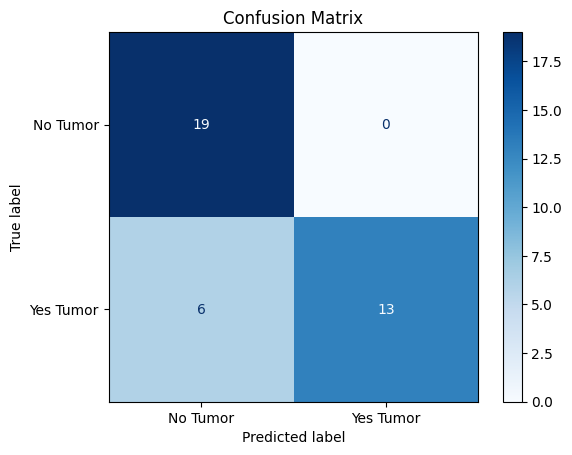

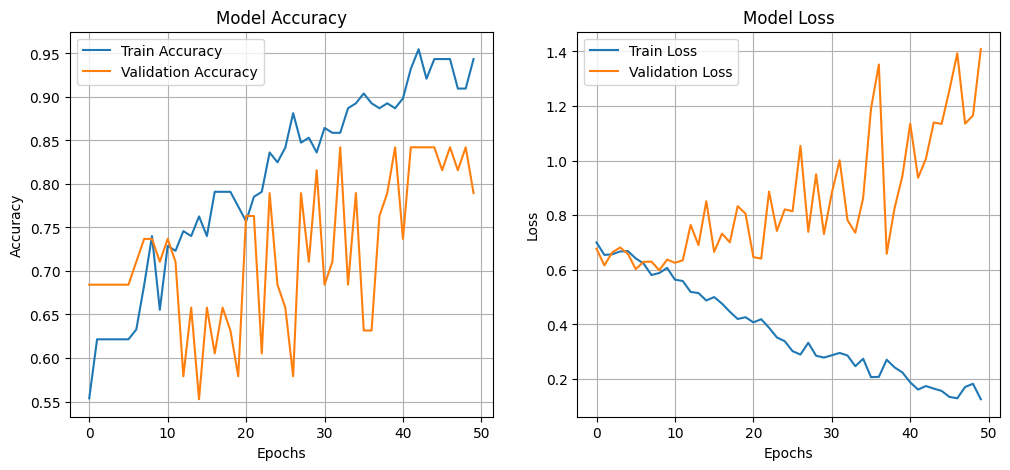

In [ ]:
# -------------------------------------------
# STEP 4: Evaluate Model
# -------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy:", test_acc)

y_hat = model.predict(x_test)
y_pred = (y_hat > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Yes Tumor"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Tumor", "Yes Tumor"])
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()
# -------------------------------------------

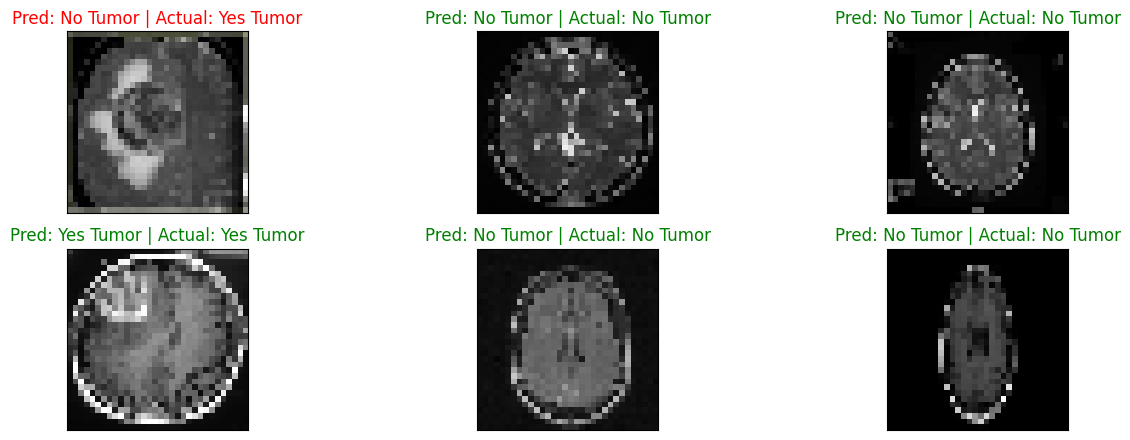

In [ ]:
# -------------------------------------------
# STEP 5: Predict Sample Images
# -------------------------------------------
labels = ["No Tumor", "Yes Tumor"]
figure = plt.figure(figsize=(15, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=6, replace=False)):
    ax = figure.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))

    pred_index = 1 if y_hat[index] > 0.5 else 0
    true_index = y_test[index]

    ax.set_title(
        f"Pred: {labels[pred_index]} | Actual: {labels[true_index]}",
        color=("green" if pred_index == true_index else "red")
    )

plt.show()
# -------------------------------------------